首先，需要导入所需的库。

In [137]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython.display import clear_output


为了模拟线性回归，我们创建一些带有随机噪声的线性数据。

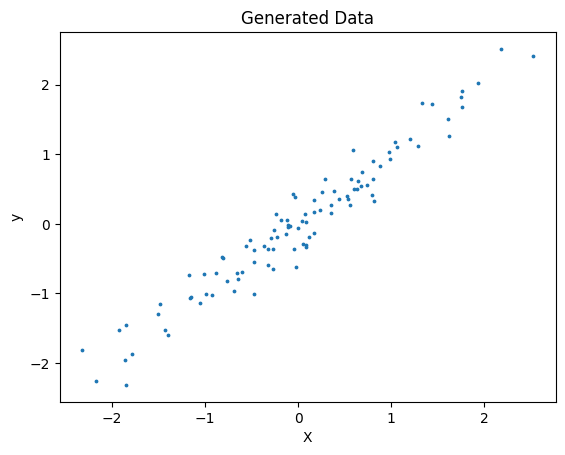

In [138]:
# 创建真实的权重和偏置
true_w = 2.0
true_b = 3.0

# 生成数据
X = torch.randn(100, 1) * 10
y = true_w * X + true_b + torch.randn(100, 1) * 5  # 添加一些噪声

# 数据标准化
mean_x = torch.mean(X)
std_x = torch.std(X)
mean_y = torch.mean(y)
std_y = torch.std(y)

X = (X - mean_x) / std_x
y = (y - mean_y) / std_y

# 可视化数据
plt.scatter(X.numpy(), y.numpy(), 3)
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


用 nn.Module 定义一个简单的线性回归模型。

前向传播 (Forward Pass)：forward 方法定义了数据如何从输入层流向输出层。在这里，它只是简单地通过一个全连接层。

In [139]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 定义一个全连接层
        # `in_features` 是输入特征数，`out_features` 是输出特征数
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # 前向传播：计算预测值
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()
print(model)


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


nn.MSELoss 是 PyTorch 内置的均方误差损失函数，用于衡量预测值与真实值之间的差异。

torch.optim.SGD 实现了随机梯度下降算法，它会根据损失函数的梯度来更新模型的参数（w 和 b）。

损失函数 (Loss Function)：criterion 就是你大纲中的 L(w, b)，即均方误差

梯度下降 (Gradient Descent)：optimizer 负责根据梯度来更新模型参数，其核心思想是朝着梯度反方向移动以最小化损失。


In [140]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # 优化器，学习率为0.01
# torch.optim.SGD 实现了随机梯度下降算法，它会根据损失函数的梯度来更新模型的参数（w 和 b）。

反向传播 (Backward Propagation)：loss.backward() 是 PyTorch 的核心魔法。它会自动遍历整个计算图，利用链式法则高效地计算出每个参数（w 和 b）对损失函数的偏导数。

梯度：loss.backward() 执行后，model.linear.weight.grad 和 model.linear.bias.grad 就会存储相应的偏导数。

参数更新：optimizer.step() 使用这些梯度值来调整 w 和 b，从而让模型在下一次迭代时更接近真实值。 

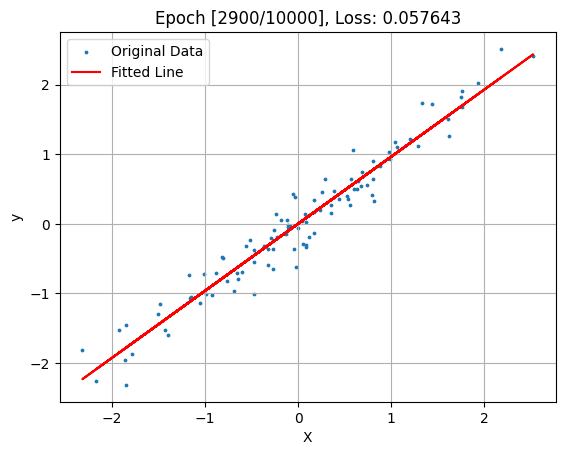

训练后的 w: 1.9767, b: 2.4759
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9767, b: 2.4759
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9767, b: 2.4758
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9768, b: 2.4757
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9768, b: 2.4757
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9768, b: 2.4756
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9768, b: 2.4755
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9768, b: 2.4755
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9769, b: 2.4754
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9769, b: 2.4753
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9769, b: 2.4752
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9769, b: 2.4752
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9770, b: 2.4751
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9770, b: 2.4750
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9770, b: 2.4750
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9770, b: 2.4749
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9770, b: 2.4748
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9771, b: 2.4748
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9771, b: 2.4747
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9771, b: 2.4746
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9771, b: 2.4746
真实的 w: 2.0, b: 3.0

训练后的 w: 1.9772, b: 2.4745
真实的 w: 2

In [141]:

# 训练模型
epochs = 10000

last_loss_value = 0

for epoch in range(epochs):
    # 1. 前向传播：计算预测值
    predictions = model(X)

    # 2. 计算损失
    loss = criterion(predictions, y)

    # 3. 反向传播：计算梯度
    # 首先，清零优化器中的梯度，防止累积
    optimizer.zero_grad()
    # 这一步会自动利用链式法则计算每个参数的偏导数
    loss.backward()

    # 4. 更新参数
    # 根据梯度更新模型参数 w 和 b
    optimizer.step()
    
    # 当损失率不再变化时，停止训练
    if abs(last_loss_value - loss.item()) < 0.0000001:
        break
    else:
        last_loss_value = loss.item()  # 记录当前损失值

    # # # 打印训练过程
    # if (epoch + 1) % 10 == 0:
    #     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')
    
    # 可视化训练过程
    if (epoch + 1) % 100 == 0:
        clear_output(wait=True)
        plt.scatter(X.numpy(), y.numpy(), 3, label="Original Data")
        plt.plot(X.numpy(), model(X).detach().numpy(), 'r', label="Fitted Line")
        plt.title(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()

    # 4. 反标准化并可视化结果
    # 从模型中获取在标准化数据上训练得到的参数
    trained_w_normalized = model.linear.weight.item()
    trained_b_normalized = model.linear.bias.item()

    # 根据反向转换公式，计算原始数据的参数
    trained_w = trained_w_normalized * std_y / std_x
    trained_b = trained_b_normalized * std_y + mean_y - trained_w * mean_x

    print(f"训练后的 w: {trained_w:.4f}, b: {trained_b:.4f}")
    print(f"真实的 w: {true_w}, b: {true_b}\n")


最后，将训练后的模型预测结果与原始数据进行对比。

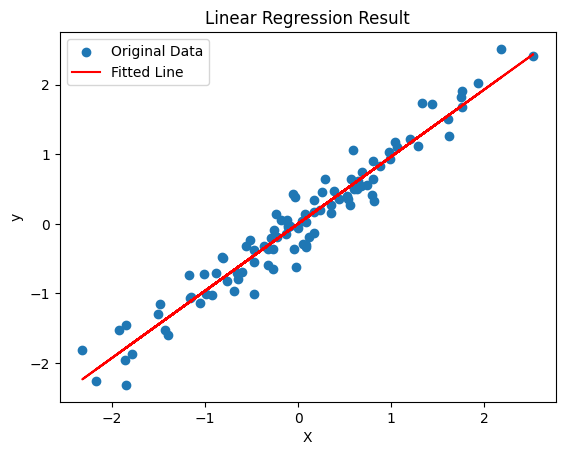

In [142]:
# 可视化最终结果
predicted_y = model(X).detach().numpy() # detach() 取消梯度计算，转为 numpy

plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(X.numpy(), predicted_y, 'r', label="Fitted Line")
plt.title("Linear Regression Result")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
